In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd

In [2]:
input_data = '../NewData.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'./out/{mode}/description.json'
synthetic_data = f'./out/{mode}/sythetic_data.csv'

In [3]:

# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 10

# specify categorical attributes
categorical_attributes = {'Hypertension':True, 'Drink': True, 'Smoke': True, 'Gender':True, 'Outcome':True }

# specify which attributes are candidate keys of input dataset.
# candidate_keys = {'ssn': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 0

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 3

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 1000 # Here 32561 is the same as input dataset, but it can be set to another number.

In [4]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes)#,
                                                        #attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT AST
Adding attribute Weight
Adding attribute SBP
Adding attribute Height
Adding attribute FPG
Adding attribute ALT
Adding attribute BMI
Adding attribute Scr
Adding attribute PR
Adding attribute DBP
Adding attribute TC
Adding attribute Age
Adding attribute BUN
Adding attribute TG
Adding attribute Gender
Adding attribute Hypertension
Adding attribute Outcome
Adding attribute Smoke
Adding attribute Drink
========================== BN constructed ==========================


In [5]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    Weight       has parents ['AST'].
    SBP          has parents ['Weight', 'AST'].
    Height       has parents ['Weight', 'SBP', 'AST'].
    FPG          has parents ['SBP', 'Height', 'AST'].
    ALT          has parents ['Height', 'FPG', 'SBP'].
    BMI          has parents ['Height', 'FPG', 'SBP'].
    Scr          has parents ['ALT', 'BMI', 'AST'].
    PR           has parents ['ALT', 'BMI', 'AST'].
    DBP          has parents ['ALT', 'BMI', 'AST'].
    TC           has parents ['ALT', 'BMI', 'AST'].
    Age          has parents ['ALT', 'BMI', 'AST'].
    BUN          has parents ['ALT', 'BMI', 'AST'].
    TG           has parents ['ALT', 'BMI', 'AST'].
    Gender       has parents ['ALT', 'BMI', 'Height'].
    Hypertension has parents ['ALT', 'BMI', 'AST'].
    Outcome      has parents ['FPG', 'DBP', 'SBP'].
    Smoke        has parents ['PR', 'Age', 'ALT'].
    Drink        has parents ['PR', 'DBP', 'ALT'].


In [6]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [7]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

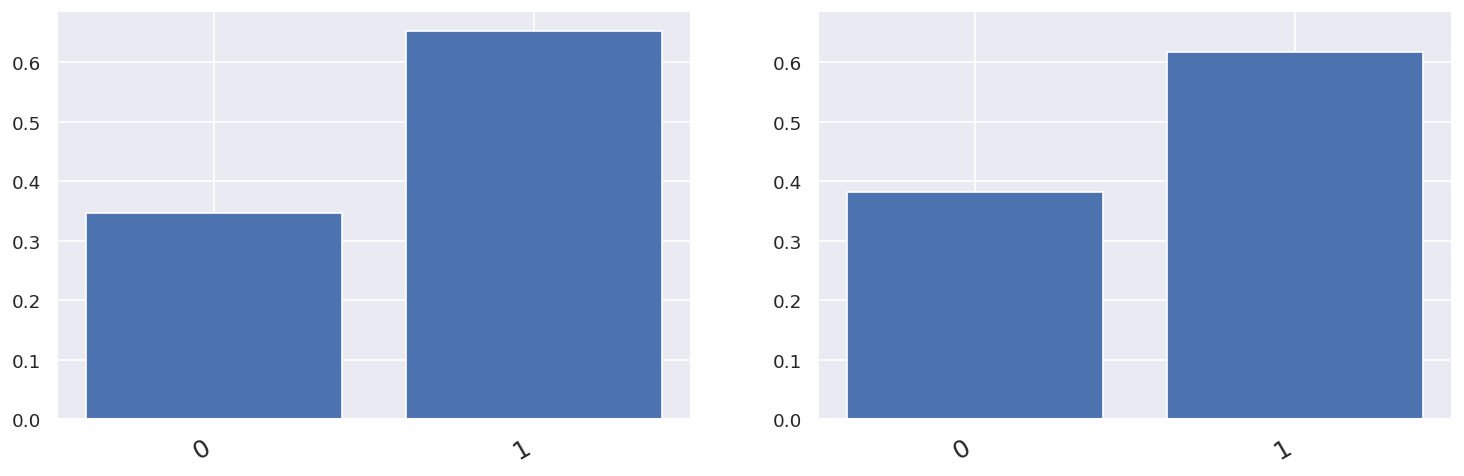

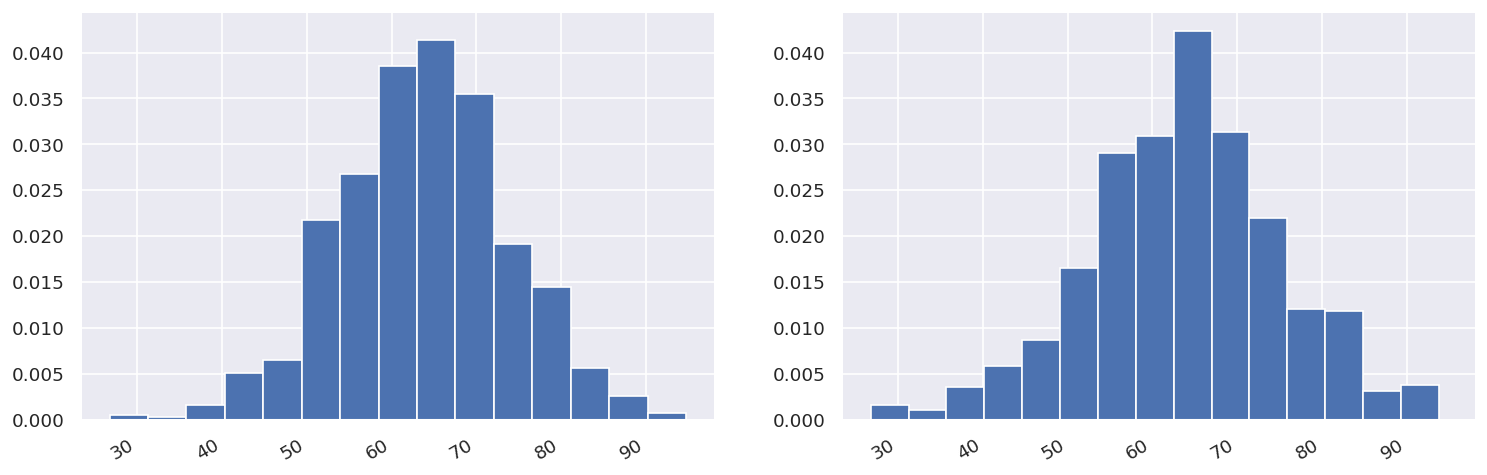

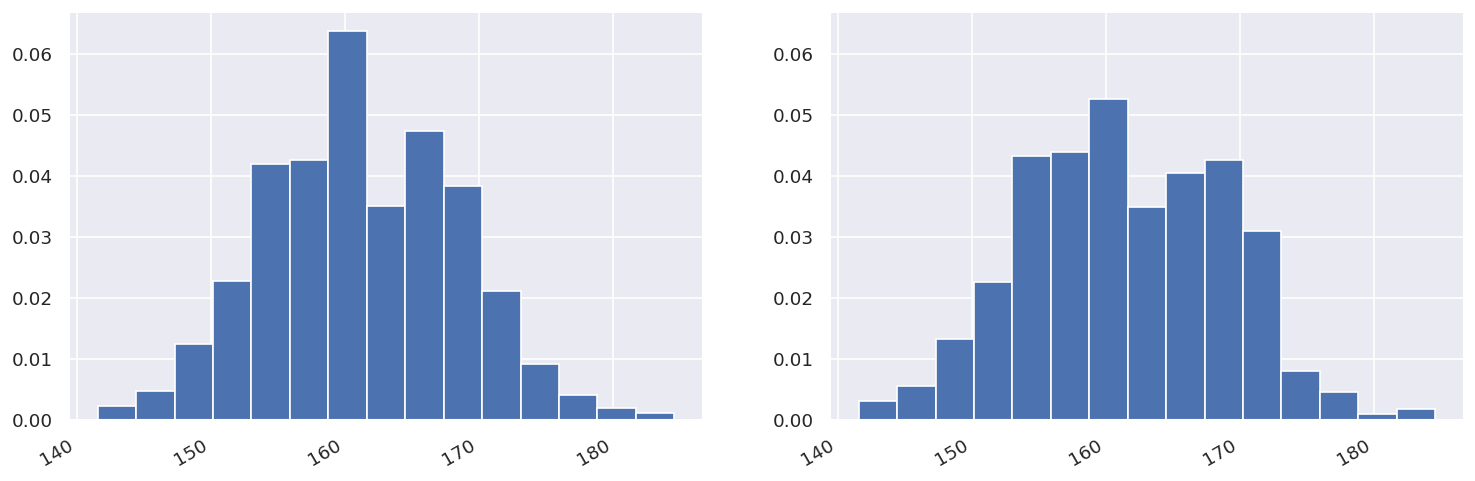

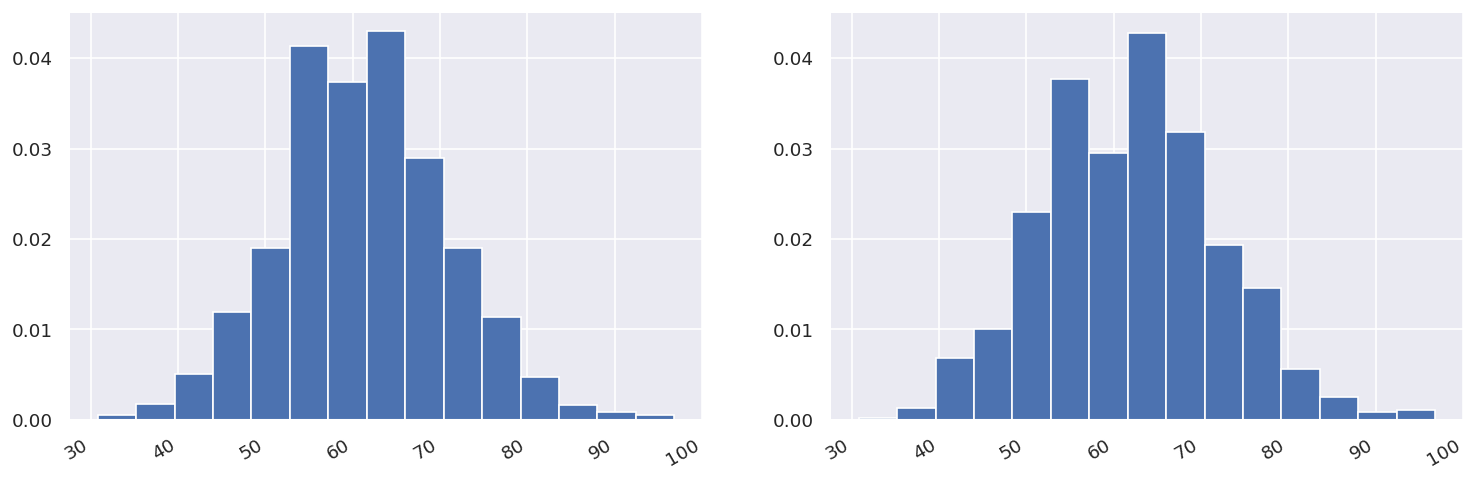

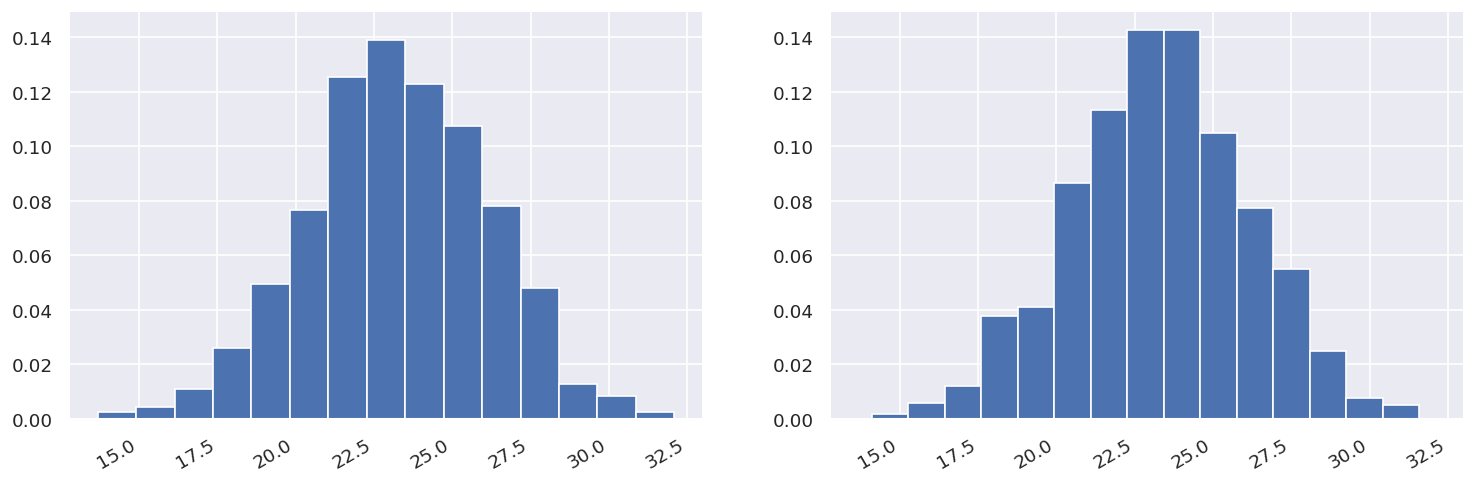

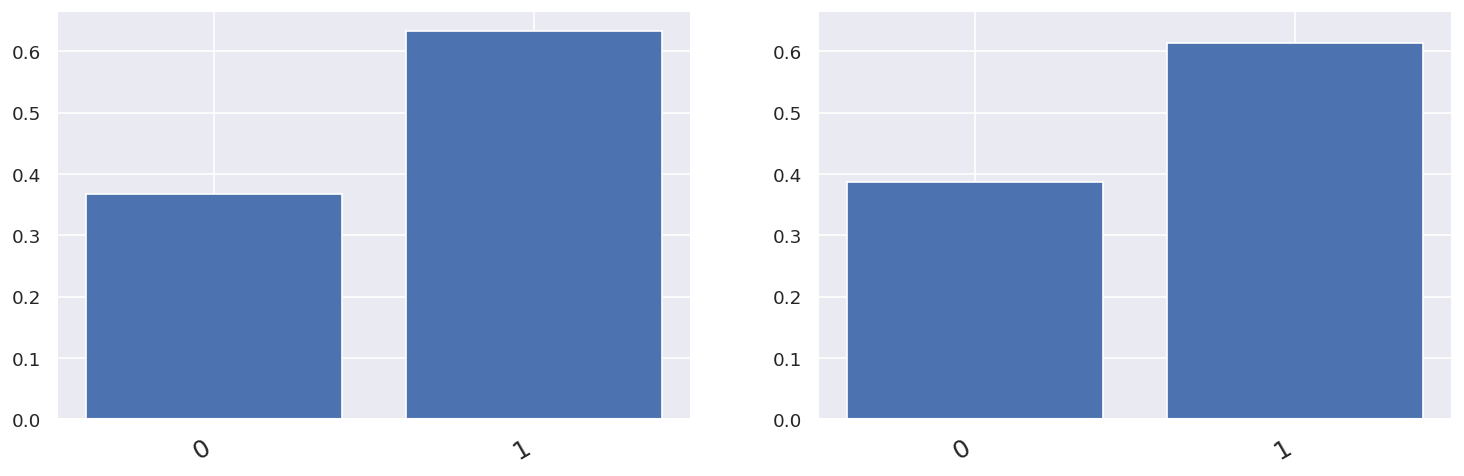

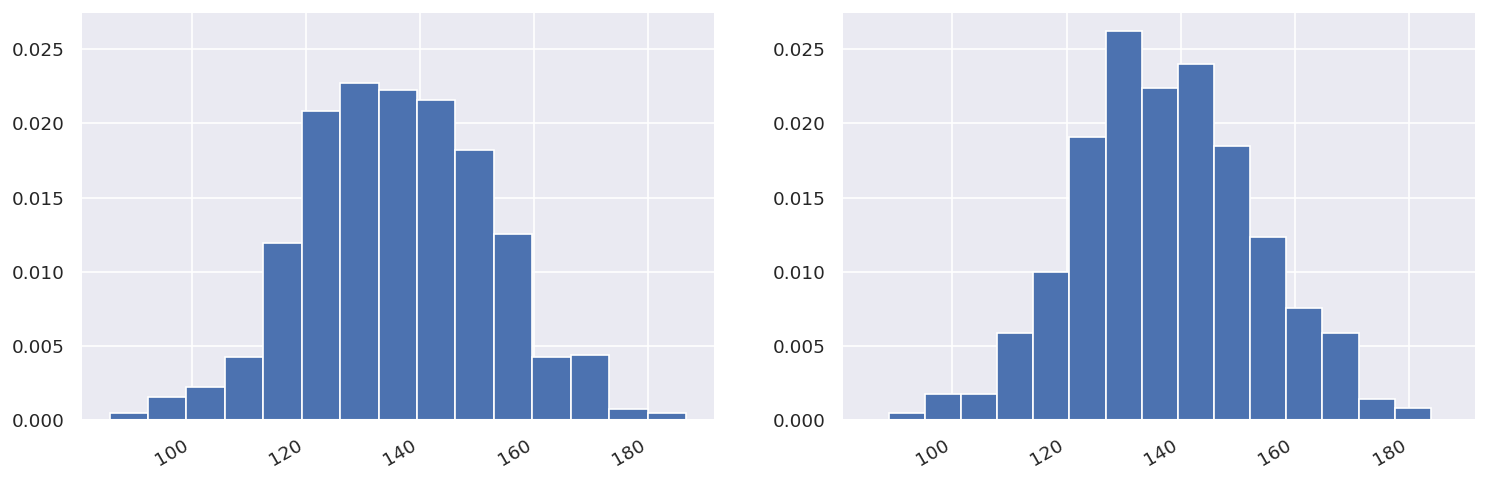

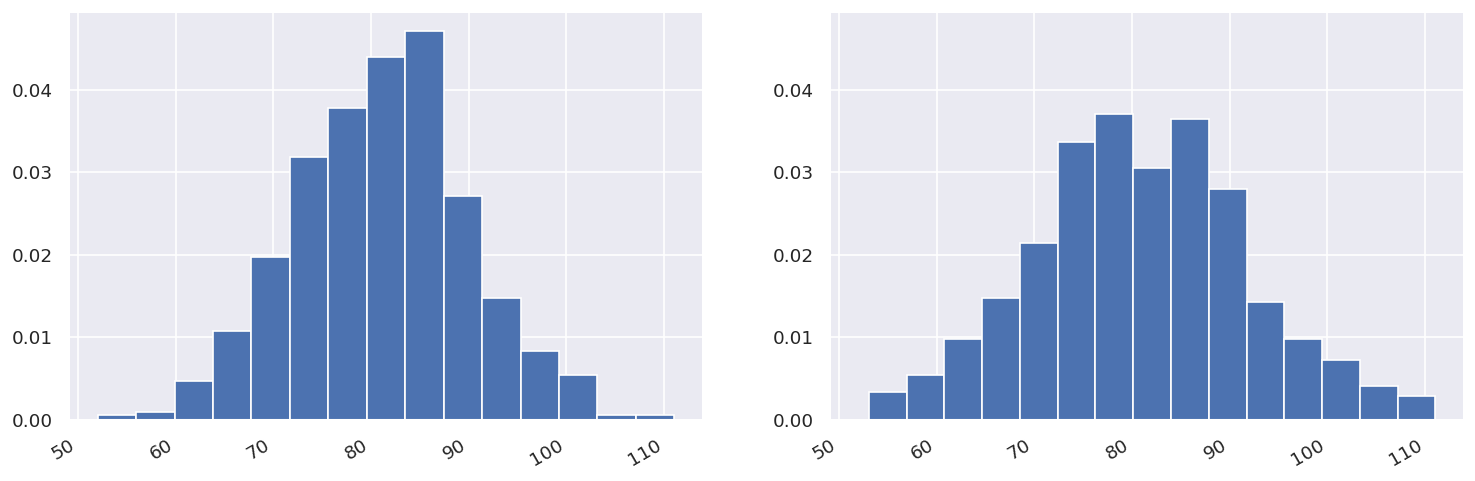

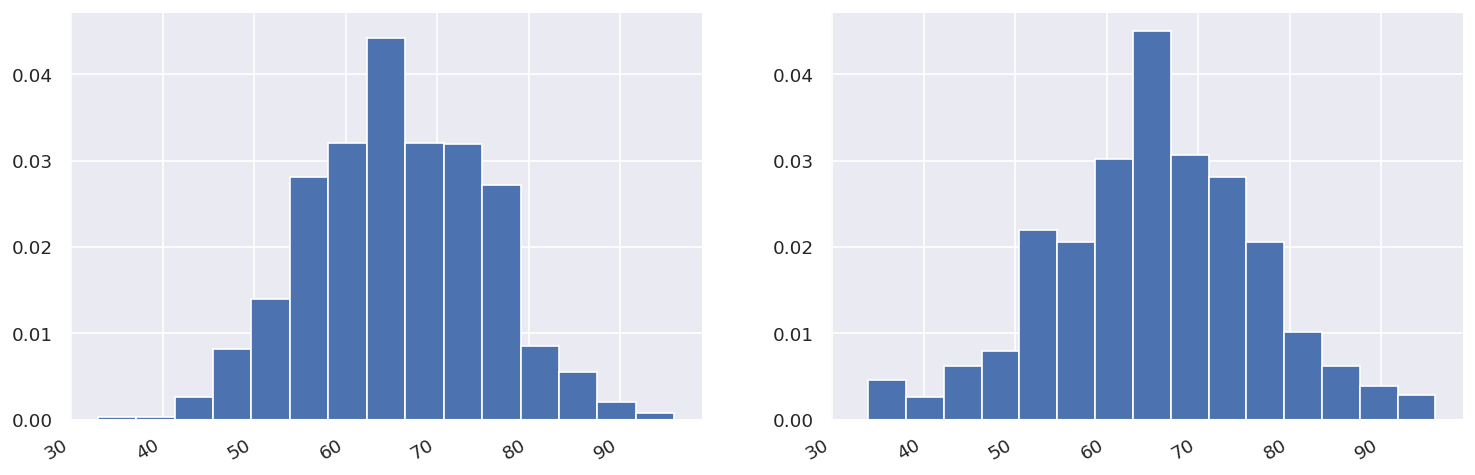

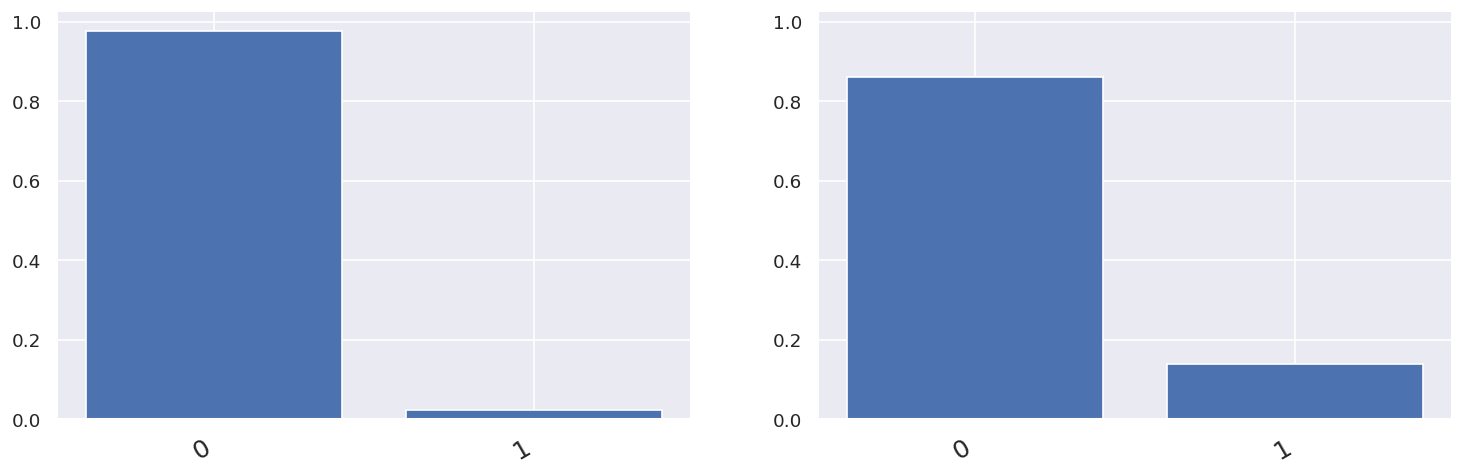

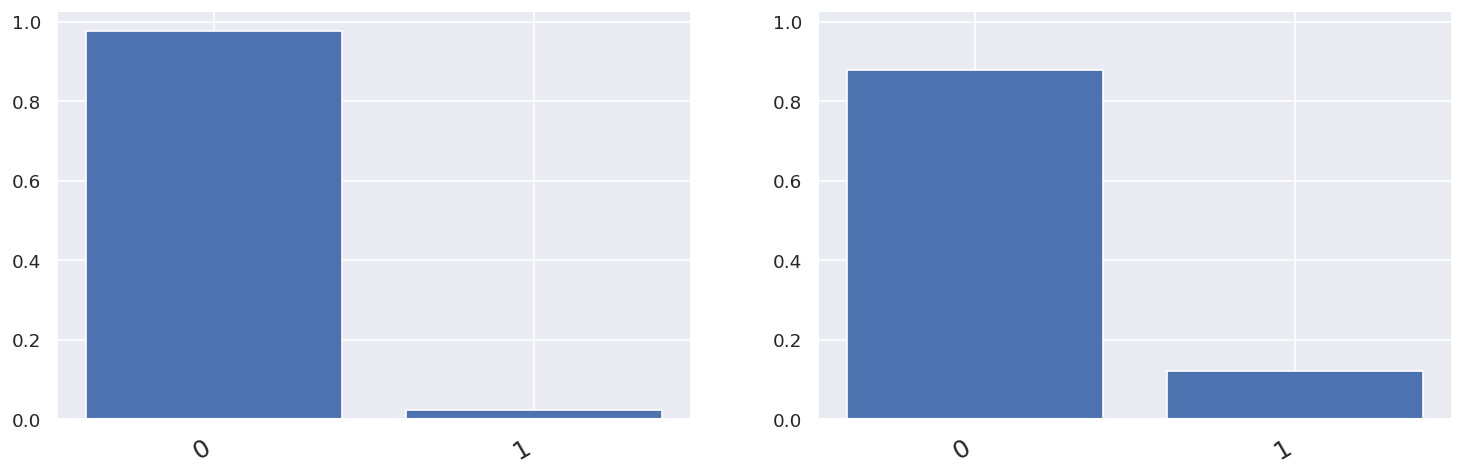

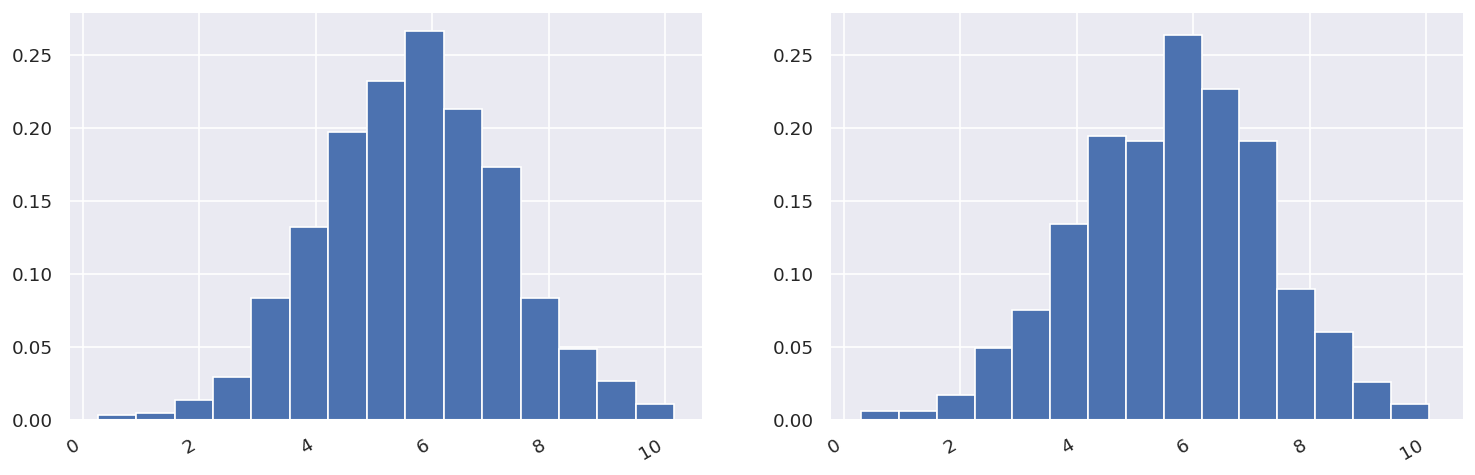

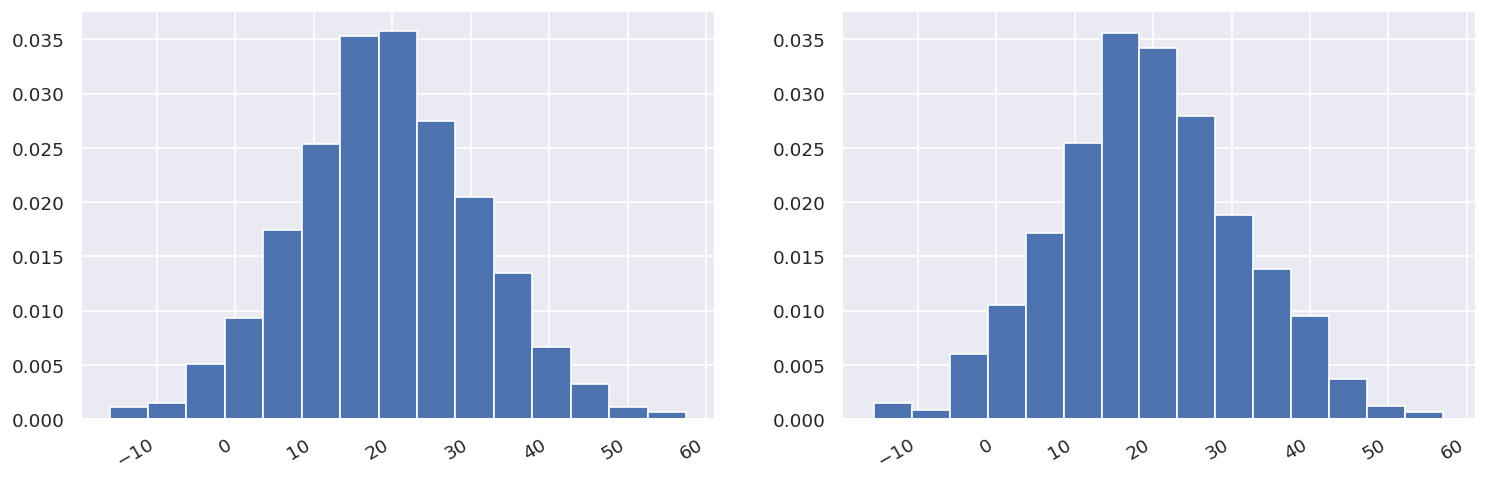

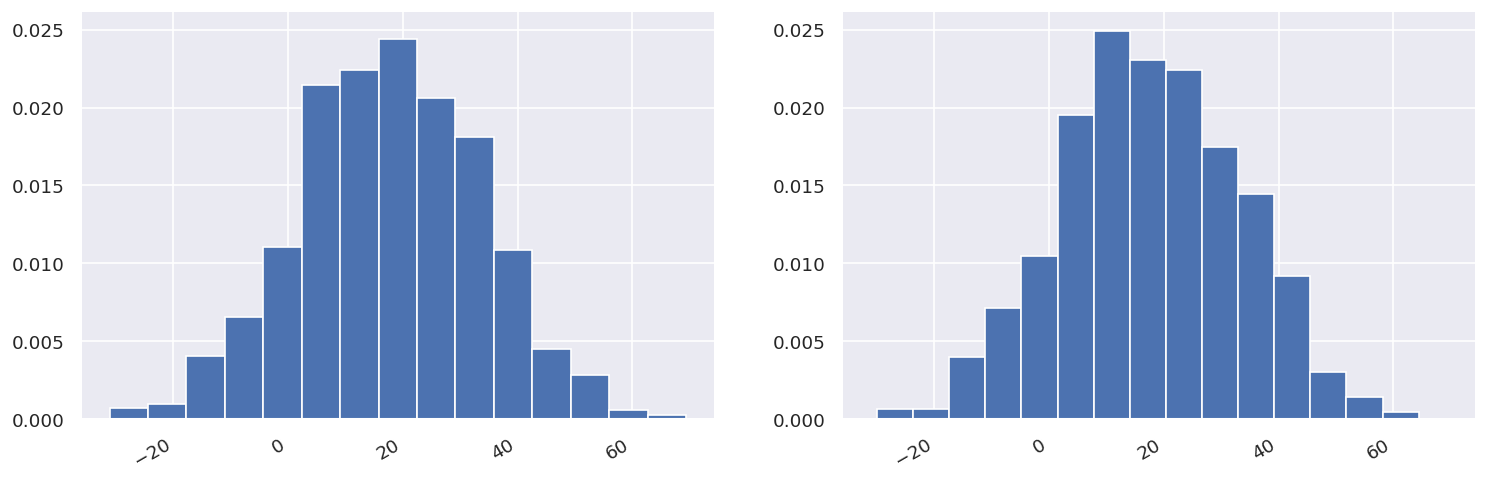

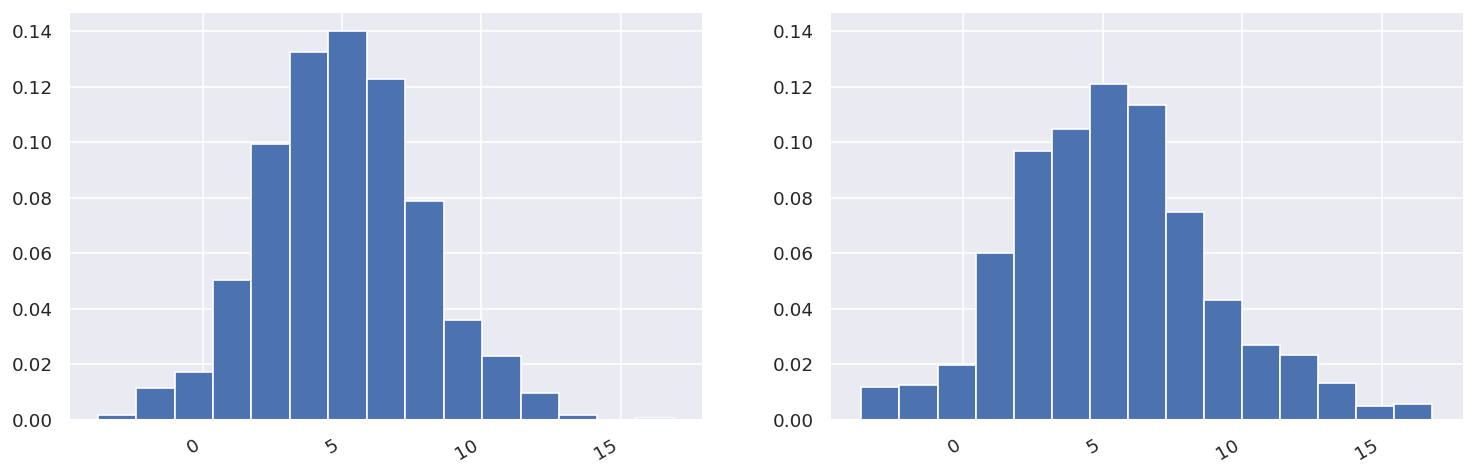

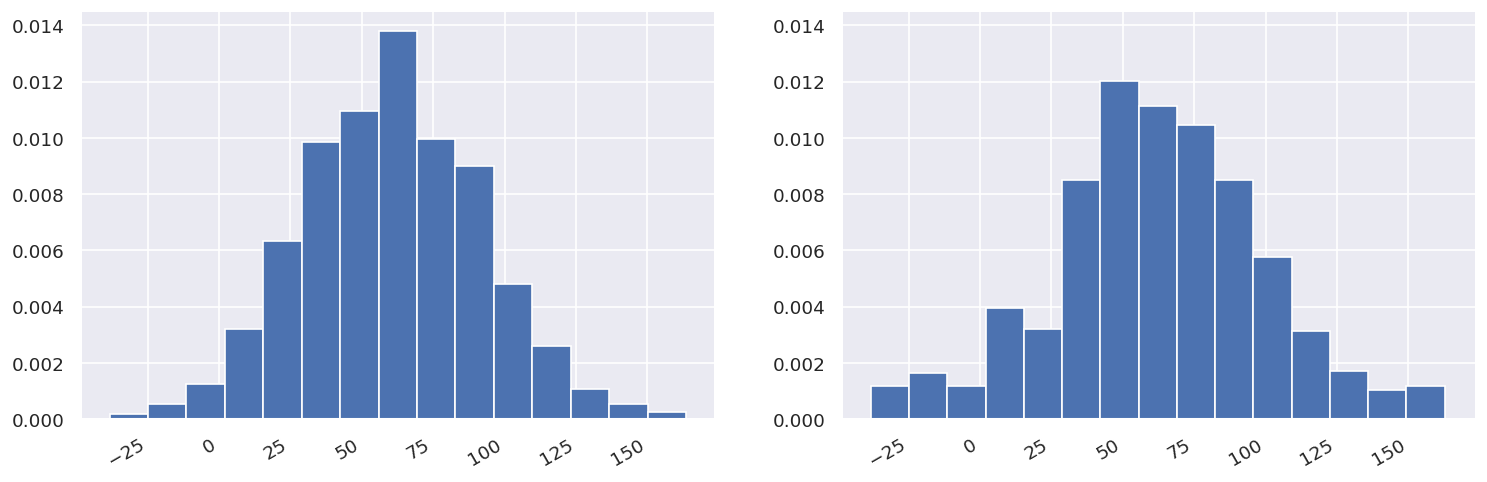

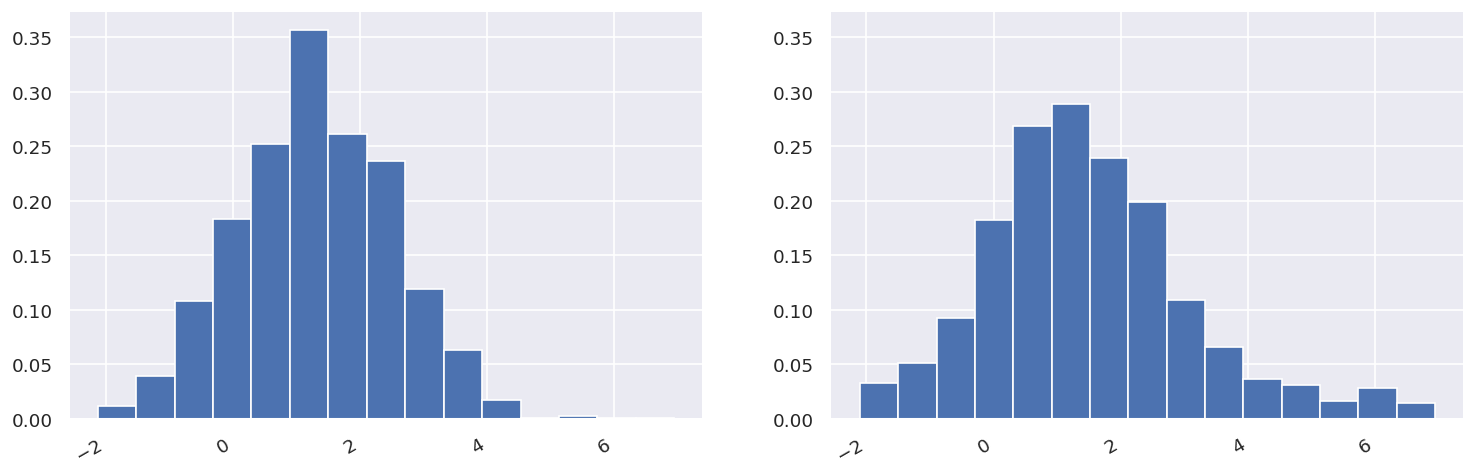

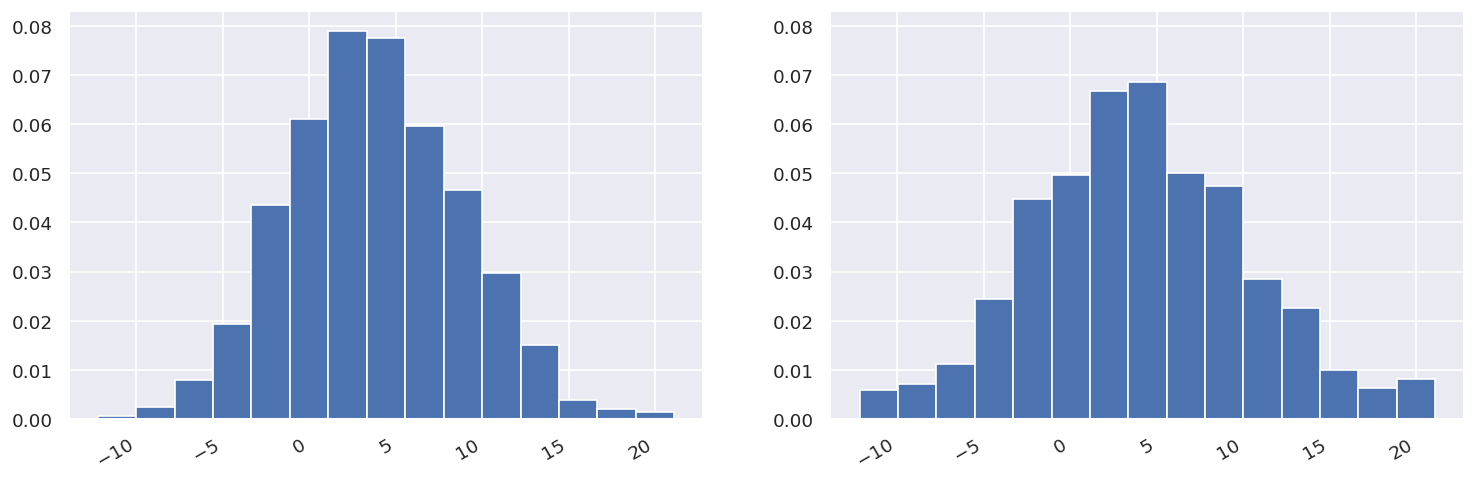

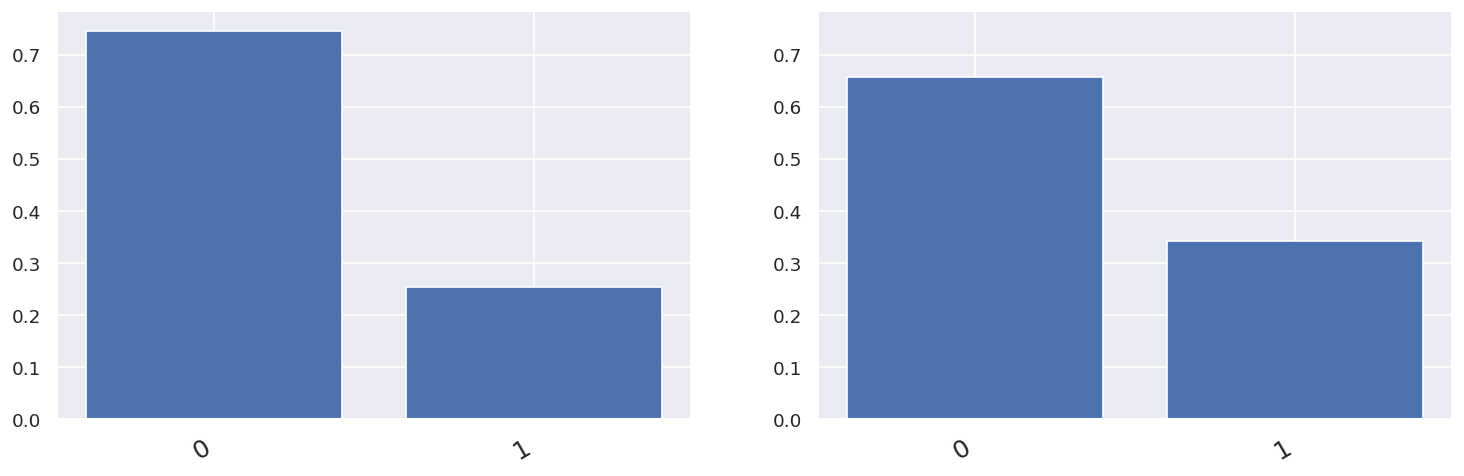

In [8]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

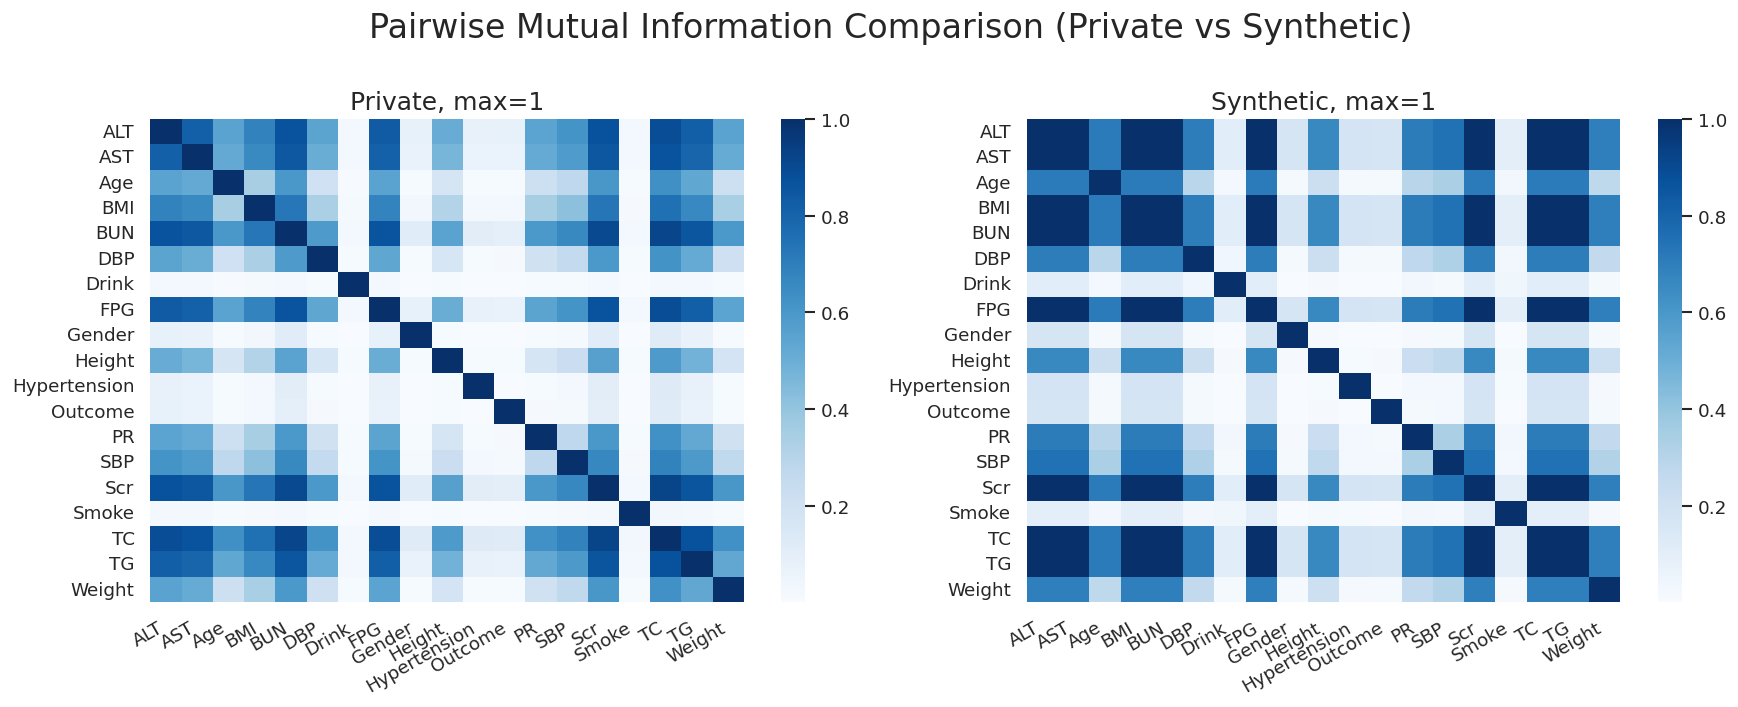

In [9]:
inspector.mutual_information_heatmap()